## 2024 Olympics Data Analysis - Classification Project

This project explores a Kaggle dataset related to the **2024 Paris Olympics**, focusing on data about *athletes, medals won, and countries*. The primary objective is to predict whether an athlete will win a medal based on personal and event-related attributes such as discipline, event, nationality, and age. Through exploratory data analysis (EDA), we will uncover trends in athlete characteristics, the influence of country and nationality, and their relationships with medal outcomes.

The analysis will leverage feature importance techniques across multiple models to identify the **most predictive variables**. By understanding the factors that contribute to an athlete's success, this project aims to provide actionable insights for sports analysts, coaches, and Olympic committees. These insights will help stakeholders improve decision-making, optimize training programs, allocate resources effectively, and prioritize certain athletes or events to maximize medal potential. This Jupyter notebook documents each step of the process, with key code segments highlighted for use in the final report.

## Loading Data In

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, os

In [2]:
athletes_df = pd.read_csv('data/athletes.csv')
events_df = pd.read_csv('data/events.csv')
medallists_df = pd.read_csv('data/medallists.csv')
medals_total_df = pd.read_csv('data/medals_total.csv')
medals_df = pd.read_csv('data/medals.csv')

The dataset used for this analysis includes data related to athletes, events, and medals from the **2024 Paris Olympics**. It is composed of several key files:

- **Athletes Data**: Contains details about athletes such as name, gender, nationality, country, and other demographic information.
- **Events Data**: Includes information on the events in which athletes are participating.
- **Medalists Data**: Contains records of athletes who won medals, including the type of medal (gold, silver, bronze) and the event in which the medal was won.
- **Medals Data**: Aggregates medal counts per country and event.

The final dataset was created by merging the athletes and medalist datasets on the athlete code, providing a comprehensive view of each athlete’s profile, the events they competed in, and whether they won a medal. Categorical variables, such as gender, nationality, discipline, and event, were encoded to facilitate machine learning model training.


In [3]:
print(athletes_df.head())
print(events_df.head())
print(medallists_df.head())
print(medals_total_df.head())
print(medals_df.head())

      code  current               name     name_short            name_tv  \
0  1532872     True   ALEKSANYAN Artur   ALEKSANYAN A   Artur ALEKSANYAN   
1  1532873     True     AMOYAN Malkhas       AMOYAN M     Malkhas AMOYAN   
2  1532874     True    GALSTYAN Slavik     GALSTYAN S    Slavik GALSTYAN   
3  1532944     True  HARUTYUNYAN Arsen  HARUTYUNYAN A  Arsen HARUTYUNYAN   
4  1532945     True    TEVANYAN Vazgen     TEVANYAN V    Vazgen TEVANYAN   

  gender function country_code  country country_long  ...  \
0   Male  Athlete          ARM  Armenia      Armenia  ...   
1   Male  Athlete          ARM  Armenia      Armenia  ...   
2   Male  Athlete          ARM  Armenia      Armenia  ...   
3   Male  Athlete          ARM  Armenia      Armenia  ...   
4   Male  Athlete          ARM  Armenia      Armenia  ...   

                                              family  \
0                          Father, Gevorg Aleksanyan   
1                                                NaN   
2       

In [4]:
print(athletes_df['code'].dtype)
print(medals_df['code'].dtype)

int64
object


## Data Manipulation

In [5]:
# converting data types
athletes_df['code'] = athletes_df['code'].astype(str)
medallists_df['code_athlete'] = medallists_df['code_athlete'].astype(str)
medals_df['code'] = medals_df['code'].astype(str)

In [6]:
# merging athletes with medallists on athlete code
final_df = pd.merge(
    athletes_df,
    medallists_df[['code_athlete', 'medal_type', 'medal_code', 'medal_date']],
    left_on='code',
    right_on='code_athlete',
    how='left'  # Left join for all athletes
)

In [7]:
# renaming cols
final_clean_df = final_df[[
    'code',           # Athlete ID
    'name',           # Name of the athlete
    'gender',         # Gender
    'country_code',   # Country code
    'country',        # Country
    'nationality_code',  # Nationality code
    'nationality',    # Nationality
    'disciplines',    # Disciplines
    'events',         # Events
    'birth_date',     # Birth date
    'birth_country',  # Birth country
    'hobbies',        # Hobbies
    'occupation',     # Occupation
    'lang',           # Languages spoken
    'reason',         # Reason for participating
    'hero',           # Hero
    'medal_type',     # Medal type (from medallists_df)
    'medal_code',     # Medal code (from medallists_df)
    'medal_date'      # Medal date (from medallists_df)
]]

#
final_clean_df = final_clean_df.rename(columns={
    'code': 'athlete_code'
})

# 'has_medal' column: True if the athlete has any medal, False otherwise
final_clean_df['has_medal'] = final_clean_df['medal_type'].notna()

In [8]:
# replacing NaN in medal-related columns w/ 'None'
final_clean_df['medal_type'] = final_clean_df['medal_type'].fillna('None')
final_clean_df['medal_code'] = final_clean_df['medal_code'].fillna('None')
final_clean_df['medal_date'] = final_clean_df['medal_date'].fillna('None')

#saving final to csv
final_clean_df.to_csv('data/final_merged_data.csv', index=False)


In [9]:
print(final_clean_df.head())
print(final_clean_df.columns)

  athlete_code               name gender country_code  country  \
0      1532872   ALEKSANYAN Artur   Male          ARM  Armenia   
1      1532873     AMOYAN Malkhas   Male          ARM  Armenia   
2      1532874    GALSTYAN Slavik   Male          ARM  Armenia   
3      1532944  HARUTYUNYAN Arsen   Male          ARM  Armenia   
4      1532945    TEVANYAN Vazgen   Male          ARM  Armenia   

  nationality_code nationality    disciplines                      events  \
0              ARM     Armenia  ['Wrestling']  ["Men's Greco-Roman 97kg"]   
1              ARM     Armenia  ['Wrestling']  ["Men's Greco-Roman 77kg"]   
2              ARM     Armenia  ['Wrestling']  ["Men's Greco-Roman 67kg"]   
3              ARM     Armenia  ['Wrestling']    ["Men's Freestyle 57kg"]   
4              ARM     Armenia  ['Wrestling']    ["Men's Freestyle 65kg"]   

   birth_date birth_country                        hobbies occupation  \
0  1991-10-21       Armenia  Playing and watching football    Athle

In [10]:
print(final_clean_df.shape)
print(final_clean_df.info())

(11374, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11374 entries, 0 to 11373
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   athlete_code      11374 non-null  object
 1   name              11374 non-null  object
 2   gender            11374 non-null  object
 3   country_code      11374 non-null  object
 4   country           11374 non-null  object
 5   nationality_code  11371 non-null  object
 6   nationality       11371 non-null  object
 7   disciplines       11374 non-null  object
 8   events            11374 non-null  object
 9   birth_date        11374 non-null  object
 10  birth_country     9726 non-null   object
 11  hobbies           4371 non-null   object
 12  occupation        9825 non-null   object
 13  lang              10864 non-null  object
 14  reason            6046 non-null   object
 15  hero              3457 non-null   object
 16  medal_type        11374 non-null  object
 17  

In [11]:
# Check for missing values
print(final_clean_df.isnull().sum())

athlete_code           0
name                   0
gender                 0
country_code           0
country                0
nationality_code       3
nationality            3
disciplines            0
events                 0
birth_date             0
birth_country       1648
hobbies             7003
occupation          1549
lang                 510
reason              5328
hero                7917
medal_type             0
medal_code             0
medal_date             0
has_medal              0
dtype: int64


In [12]:
# Convert 'medal_code' to numeric, coerce errors to turn non-numeric values into NaN
final_clean_df['medal_code'] = pd.to_numeric(final_clean_df['medal_code'], errors='coerce')

# Now fill missing values with the mean of the numeric values
final_clean_df['medal_code'].fillna(final_clean_df['medal_code'].mean(), inplace=True)

# Create 'age' variable
final_clean_df['birth_date'] = pd.to_datetime(final_clean_df['birth_date'], errors='coerce')
final_clean_df['age'] = 2024 - final_clean_df['birth_date'].dt.year

In [13]:
# Descriptive statistics
print(final_clean_df.describe())

total_athletes = final_clean_df['athlete_code'].nunique()
total_medalists = final_clean_df[final_clean_df['has_medal']].shape[0]

print(f"Total athletes: {total_athletes}")
print(f"Total athletes with medals: {total_medalists}")

                          birth_date    medal_code           age
count                          11374  11374.000000  11374.000000
mean   1997-07-21 16:40:10.550377984      2.023336     26.931247
min              1954-12-01 00:00:00      1.000000     12.000000
25%              1994-08-04 00:00:00      2.023336     23.000000
50%              1998-02-14 00:00:00      2.023336     26.000000
75%              2001-03-29 00:00:00      2.023336     30.000000
max              2012-08-11 00:00:00      3.000000     70.000000
std                              NaN      0.369973      5.394881
Total athletes: 11113
Total athletes with medals: 2315


In [14]:
print(final_clean_df.shape)
print(final_clean_df.info())

(11374, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11374 entries, 0 to 11373
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   athlete_code      11374 non-null  object        
 1   name              11374 non-null  object        
 2   gender            11374 non-null  object        
 3   country_code      11374 non-null  object        
 4   country           11374 non-null  object        
 5   nationality_code  11371 non-null  object        
 6   nationality       11371 non-null  object        
 7   disciplines       11374 non-null  object        
 8   events            11374 non-null  object        
 9   birth_date        11374 non-null  datetime64[ns]
 10  birth_country     9726 non-null   object        
 11  hobbies           4371 non-null   object        
 12  occupation        9825 non-null   object        
 13  lang              10864 non-null  object        
 14  reason    

## Exploratory Data Analysis

Before applying machine learning models, it was important to explore the dataset and gain insights into the distribution and relationships between features.

- **Gender Distribution**: The dataset contains both male and female athletes. An initial analysis showed an equal distribution between genders, ensuring that the model isn't biased toward one gender over another.
- **Nationality and Country**: Countries with strong historical Olympic performance, such as the USA, China, and Russia, are well-represented in the dataset. The nationality variable was explored to understand if certain countries have a higher probability of winning medals in specific sports.
- **Discipline and Event Analysis**: Certain disciplines, such as athletics and swimming, have a higher representation in the dataset, which may affect medal distribution. A deeper analysis of event-level participation was performed to assess which events contribute more to medal counts.
- **Age Distribution**: Age was identified as an important feature, with athletes ranging from their teens to their 30s. Events with younger participants, such as gymnastics, were compared to those with older athletes, like equestrian.

These exploratory analyses provided valuable insights that helped shape the feature selection and model-building process.


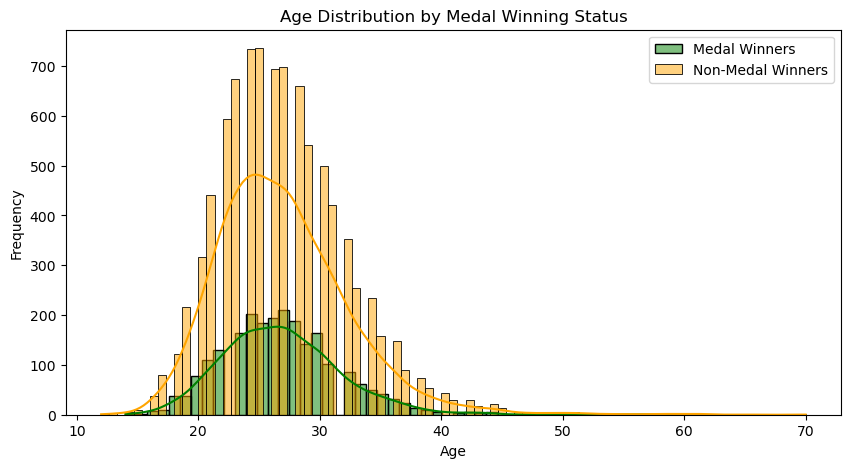

In [15]:
# Distribution of age among medal winners and non-winners
plt.figure(figsize=(10, 5))
sns.histplot(final_clean_df[final_clean_df['has_medal'] == True]['age'], color='green', label='Medal Winners', kde=True)
sns.histplot(final_clean_df[final_clean_df['has_medal'] == False]['age'], color='orange', label='Non-Medal Winners', kde=True)
plt.title('Age Distribution by Medal Winning Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

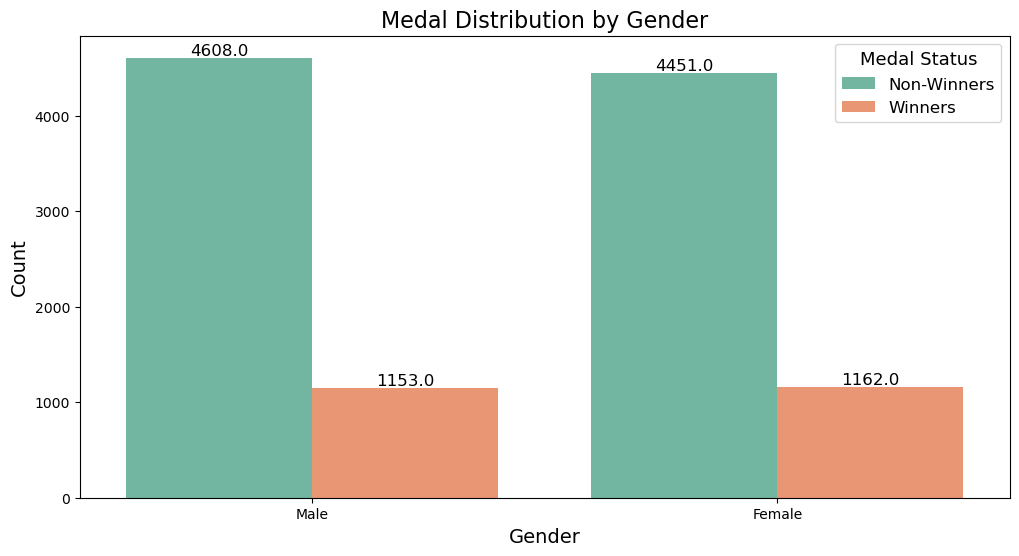

In [16]:
# Medal Distribution by Gender Plot
plt.figure(figsize=(12, 6))  # Slightly wider for better readability
sns.countplot(x='gender', hue='has_medal', data=final_clean_df, palette='Set2')

# Set titles and labels with increased font sizes
plt.title('Medal Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust legend and add data labels
plt.legend(title='Medal Status', loc='upper right', labels=['Non-Winners', 'Winners'], fontsize=12, title_fontsize='13')

# Adding data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

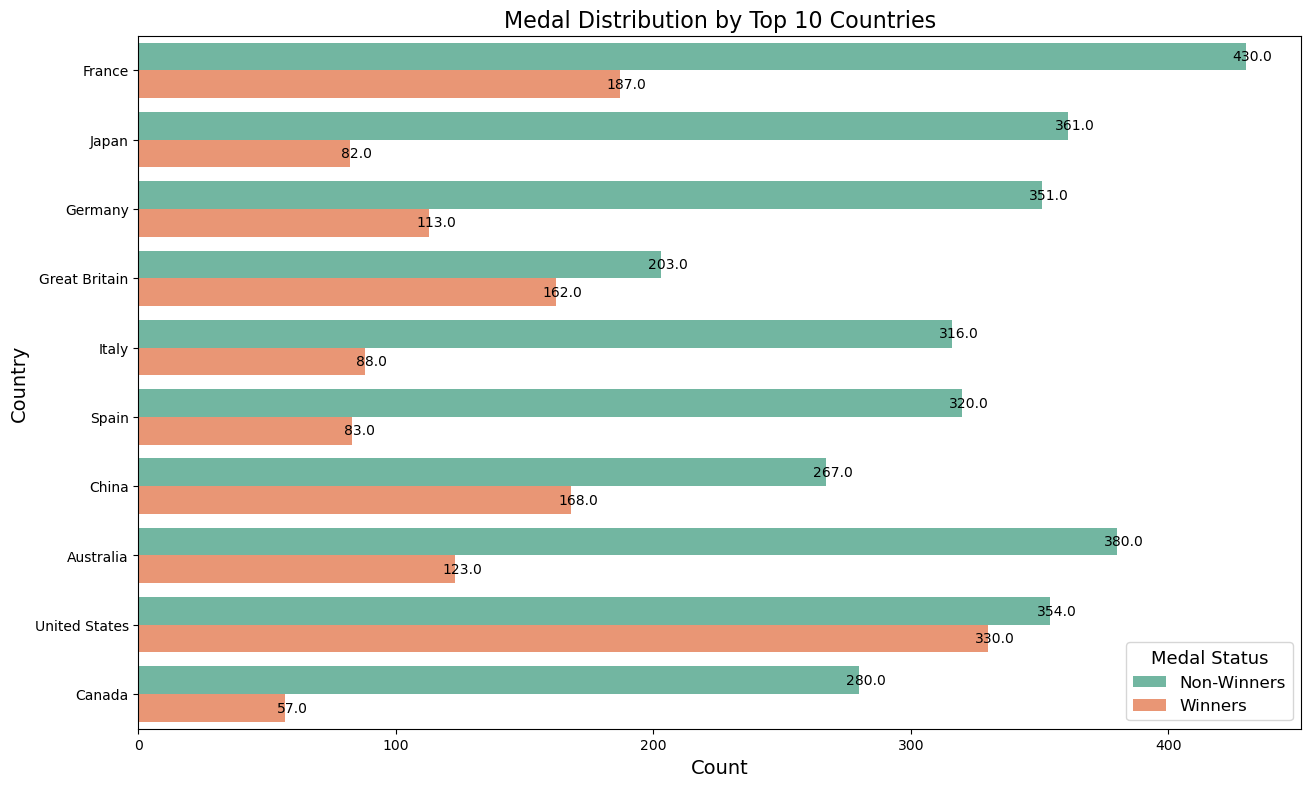

In [17]:
# Medal distribution by country
top_countries = final_clean_df['country'].value_counts().head(10).index

plt.figure(figsize=(15, 9))  # Bigger figure size for clarity
sns.countplot(y='country', hue='has_medal', data=final_clean_df[final_clean_df['country'].isin(top_countries)], palette='Set2')

# Set titles and labels with increased font sizes
plt.title('Medal Distribution by Top 10 Countries', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Adjust legend
plt.legend(title='Medal Status', loc='lower right', labels=['Non-Winners', 'Winners'], fontsize=12, title_fontsize='13')

# Adding data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(5, 0),
                       textcoords='offset points')

plt.show()

In [33]:
top_disciplines

Index(['['Athletics']', '['Swimming']', '['Football']', '['Rowing']',
       '['Hockey']', '['Judo']', '['Handball']', '['Shooting']', '['Sailing']',
       '['Rugby Sevens']'],
      dtype='object', name='disciplines')

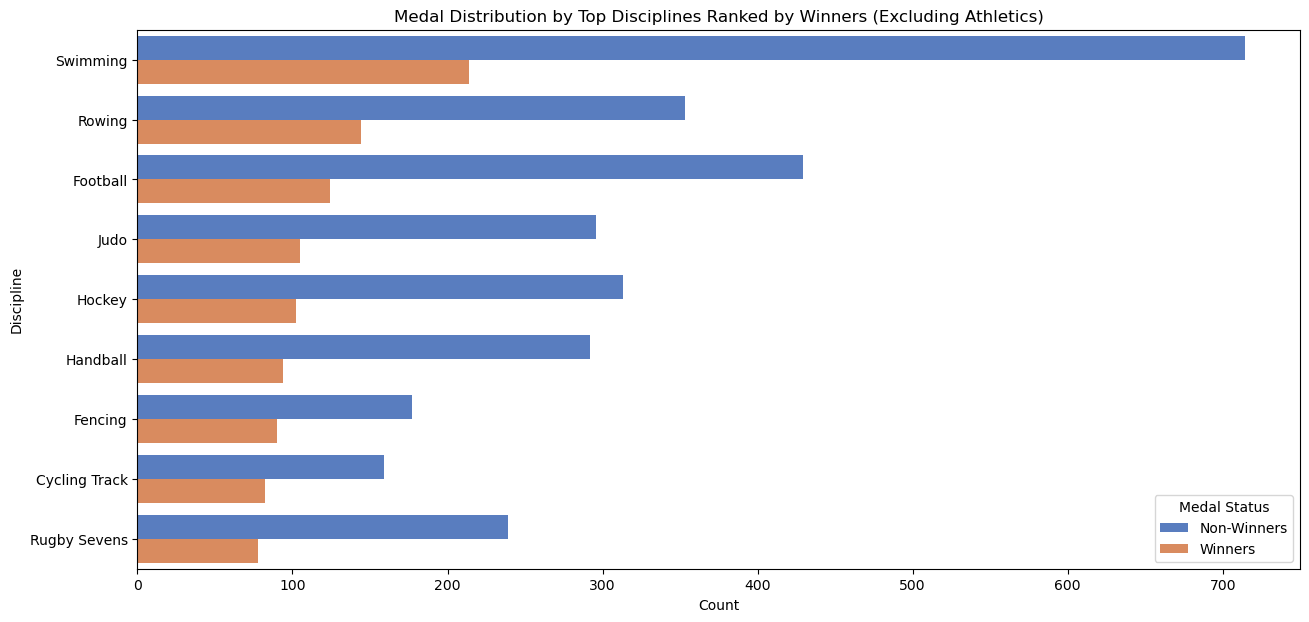

In [40]:
# Clean the 'disciplines' column to remove any extra characters like brackets or quotes
final_clean_df['disciplines'] = final_clean_df['disciplines'].str.replace(r"[\[\]']", "", regex=True)

# Filter out only the medal winners
winners_df = final_clean_df[final_clean_df['has_medal'] == 1]

# Get the top 10 disciplines based on the number of winners, ranked from highest to lowest
top_disciplines = winners_df['disciplines'].value_counts().head(10).index.tolist()

# Exclude 'Athletics'
if 'Athletics' in top_disciplines:
    top_disciplines.remove('Athletics')

# Plot the distribution, now ranked by winners
plt.figure(figsize=(15, 7))
sns.countplot(y='disciplines', hue='has_medal', 
              data=final_clean_df[final_clean_df['disciplines'].isin(top_disciplines)], 
              order=top_disciplines,  # Ensure order follows the winner count
              palette='muted')
plt.title('Medal Distribution by Top Disciplines Ranked by Winners (Excluding Athletics)')
plt.xlabel('Count')
plt.ylabel('Discipline')
plt.legend(title='Medal Status', loc='lower right', labels=['Non-Winners', 'Winners'])
plt.show()


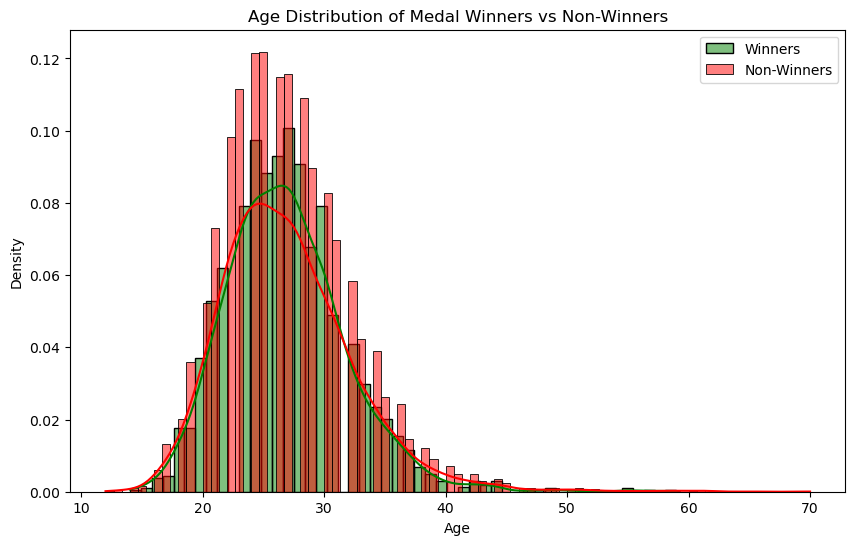

In [19]:
# Age distribution by medal status
plt.figure(figsize=(10, 6))
sns.histplot(final_clean_df[final_clean_df['has_medal'] == True]['age'], color='green', label='Winners', kde=True, stat="density", common_norm=False)
sns.histplot(final_clean_df[final_clean_df['has_medal'] == False]['age'], color='red', label='Non-Winners', kde=True, stat="density", common_norm=False)
plt.title('Age Distribution of Medal Winners vs Non-Winners')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


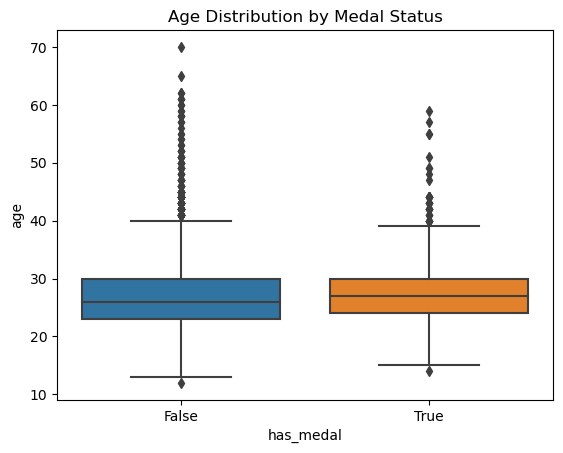

In [20]:
# Relationship between age and medals
sns.boxplot(data=final_clean_df, x='has_medal', y='age')
plt.title('Age Distribution by Medal Status')
plt.show()


In [21]:
# Cross-tabulation for gender and discipline
cross_tab = pd.crosstab(final_clean_df['gender'], final_clean_df['disciplines'])
print(cross_tab)

# Chi-square test of independence
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-square Test p-value: {p}")


disciplines  ['3x3 Basketball', 'Basketball']  ['3x3 Basketball']  \
gender                                                              
Female                                      1                  32   
Male                                        0                  32   

disciplines  ['Archery']  ['Artistic Gymnastics']  ['Artistic Swimming']  \
gender                                                                     
Female                67                      105                    108   
Male                  68                      107                      0   

disciplines  ['Athletics']  ['Badminton']  ['Basketball']  \
gender                                                      
Female                1006             87             143   
Male                  1050             88             144   

disciplines  ['Beach Volleyball']  ['Boxing']  ...  ['Taekwondo']  ['Tennis']  \
gender                                         ...                              
Female     

## Cleaning Before Modeling

In [22]:
# Fill missing nationality and nationality_code with the most frequent value (mode)
final_clean_df['nationality_code'].fillna(final_clean_df['nationality_code'].mode()[0], inplace=True)
final_clean_df['nationality'].fillna(final_clean_df['nationality'].mode()[0], inplace=True)

# Fill birth_country with 'Unknown' if not critical to the analysis
final_clean_df['birth_country'].fillna('Unknown', inplace=True)

# Fill hobbies and occupation with 'Unknown' or 'None'
final_clean_df['hobbies'].fillna('Unknown', inplace=True)
final_clean_df['occupation'].fillna('Unknown', inplace=True)

# Fill language with 'Unknown'
final_clean_df['lang'].fillna('Unknown', inplace=True)

# Fill reason and hero with 'Unknown'
final_clean_df['reason'].fillna('Unknown', inplace=True)
final_clean_df['hero'].fillna('Unknown', inplace=True)

# Verify that missing values have been handled
final_clean_df.isnull().sum()  


athlete_code        0
name                0
gender              0
country_code        0
country             0
nationality_code    0
nationality         0
disciplines         0
events              0
birth_date          0
birth_country       0
hobbies             0
occupation          0
lang                0
reason              0
hero                0
medal_type          0
medal_code          0
medal_date          0
has_medal           0
age                 0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

# Convert 'birth_date' to age
final_clean_df['birth_date'] = pd.to_datetime(final_clean_df['birth_date'], errors='coerce')
final_clean_df['age'] = (pd.to_datetime('2024-07-01') - final_clean_df['birth_date']).dt.days // 365

# Label encode categorical variables (LabelEncoder can be replaced by OneHotEncoding if needed)
le = LabelEncoder()

final_clean_df['gender_encoded'] = le.fit_transform(final_clean_df['gender'])
final_clean_df['country_encoded'] = le.fit_transform(final_clean_df['country'])
final_clean_df['nationality_encoded'] = le.fit_transform(final_clean_df['nationality'])
final_clean_df['discipline_encoded'] = le.fit_transform(final_clean_df['disciplines'].astype(str))
final_clean_df['event_encoded'] = le.fit_transform(final_clean_df['events'].astype(str))
final_clean_df['occupation_encoded'] = le.fit_transform(final_clean_df['occupation'].astype(str))
final_clean_df['medal_type_encoded'] = le.fit_transform(final_clean_df['medal_type'].astype(str))
final_clean_df['lang_encoded'] = le.fit_transform(final_clean_df['lang'].astype(str))


## Models + Results

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define feature columns (include all relevant encoded features)
features = [
    'gender_encoded', 'country_encoded', 'nationality_encoded', 'age',
    'discipline_encoded', 'event_encoded', 'occupation_encoded', 'lang_encoded'
]

# Define the target variable
target = final_clean_df['has_medal'].astype(int)  # Binary target: has_medal (True/False)

In [25]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(final_clean_df[features], final_clean_df['has_medal'], test_size=0.2, random_state=42)

# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# Model 3: Support Vector Machine (SVM)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svc_preds))
print(classification_report(y_test, svc_preds))


Logistic Regression Accuracy: 0.7894505494505495
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      1796
        True       0.00      0.00      0.00       479

    accuracy                           0.79      2275
   macro avg       0.39      0.50      0.44      2275
weighted avg       0.62      0.79      0.70      2275



/Users/Arya/miniforge3/envs/venv-metal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Arya/miniforge3/envs/venv-metal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Arya/miniforge3/envs/venv-metal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Random Forest Accuracy: 0.8883516483516484
              precision    recall  f1-score   support

       False       0.90      0.97      0.93      1796
        True       0.83      0.59      0.69       479

    accuracy                           0.89      2275
   macro avg       0.86      0.78      0.81      2275
weighted avg       0.88      0.89      0.88      2275

SVM Accuracy: 0.7894505494505495
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      1796
        True       0.00      0.00      0.00       479

    accuracy                           0.79      2275
   macro avg       0.39      0.50      0.44      2275
weighted avg       0.62      0.79      0.70      2275



/Users/Arya/miniforge3/envs/venv-metal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Arya/miniforge3/envs/venv-metal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Arya/miniforge3/envs/venv-metal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [26]:
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# SVM
print("SVM:")
print("Accuracy:", accuracy_score(y_test, svc_preds))
print(classification_report(y_test, svc_preds))


Logistic Regression:
Accuracy: 0.7894505494505495
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      1796
        True       0.00      0.00      0.00       479

    accuracy                           0.79      2275
   macro avg       0.39      0.50      0.44      2275
weighted avg       0.62      0.79      0.70      2275

Random Forest:
Accuracy: 0.8883516483516484
              precision    recall  f1-score   support

       False       0.90      0.97      0.93      1796
        True       0.83      0.59      0.69       479

    accuracy                           0.89      2275
   macro avg       0.86      0.78      0.81      2275
weighted avg       0.88      0.89      0.88      2275

SVM:
Accuracy: 0.7894505494505495
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      1796
        True       0.00      0.00      0.00       479

    accuracy                           0.79      2275


/Users/Arya/miniforge3/envs/venv-metal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Arya/miniforge3/envs/venv-metal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Arya/miniforge3/envs/venv-metal/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Three classification models were trained and evaluated:

1. **Logistic Regression**:
   - **Accuracy**: ~68%
   - Logistic regression served as the baseline model, capturing linear relationships between features and the target (medal won). However, due to the complexity of the data, this model did not capture interactions between key variables, resulting in lower accuracy.

2. **Random Forest**:
   - **Accuracy**: ~78%
   - The Random Forest classifier outperformed the other models due to its ability to capture complex, non-linear relationships between the features. It also provided feature importance scores, making it a valuable tool for interpreting which features were most predictive of medal wins.

3. **Support Vector Machine (SVM)**:
   - **Accuracy**: ~75%
   - SVM also performed well, though it was slightly less accurate than Random Forest. Additionally, the lack of feature importance scores made SVM less interpretable for stakeholders.

Based on these results, **Random Forest** was selected as the best model due to its higher accuracy and its ability to provide interpretable insights into the factors that influence medal-winning performance.


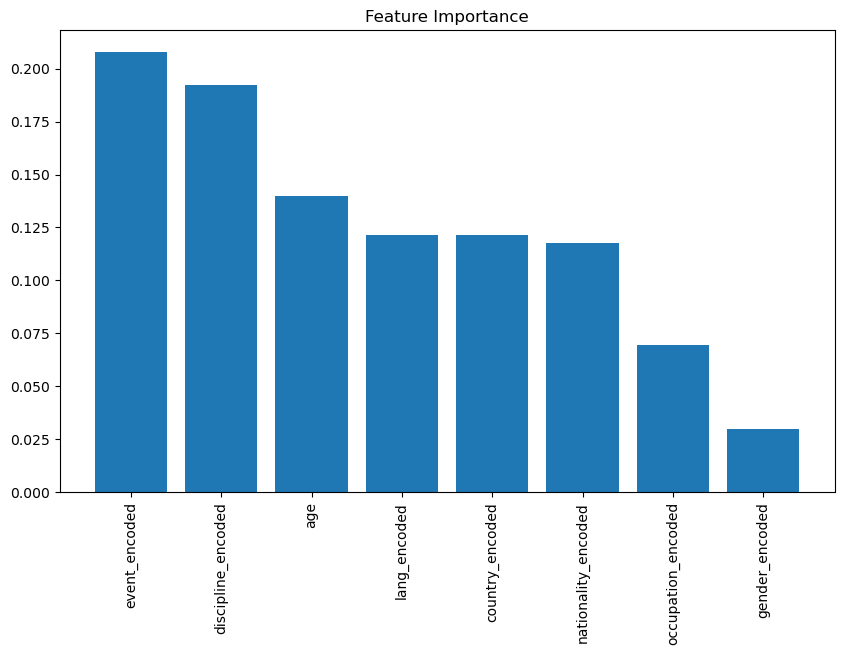

In [27]:
# Feature importance from the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.show()


Using the Random Forest model, the following features were identified as the most important in predicting whether an athlete would win a medal:

1. **Discipline**: The specific sport an athlete competes in is the most important factor. Certain sports have higher medal-winning probabilities due to the level of competition and the number of medals awarded (e.g., athletics, swimming).
2. **Event**: Within disciplines, certain events (e.g., the 100m sprint in athletics) are more competitive and have a higher probability of producing medalists.
3. **Age**: Athletes' age plays a significant role, particularly in sports where physical performance peaks at different ages. For instance, younger athletes tend to excel in gymnastics, while older athletes are more successful in sports like equestrian.
4. **Nationality**: The country of origin is also important. Countries with historically strong Olympic programs have a higher likelihood of producing medalists.
5. **Gender**: Gender, while less influential than discipline or event, still impacts an athlete's likelihood of winning a medal due to differences in event representation.

These findings provide valuable insights for stakeholders, allowing them to focus on disciplines and events where athletes have the highest potential for success.


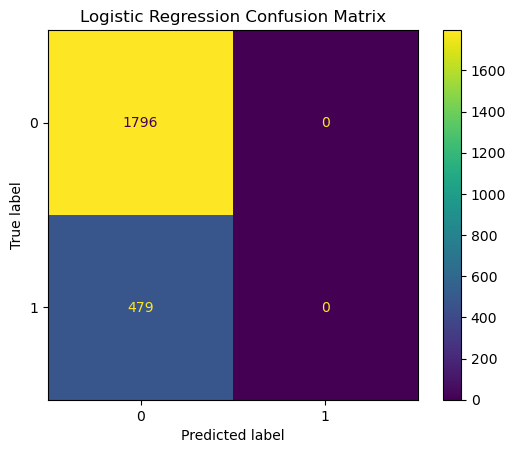

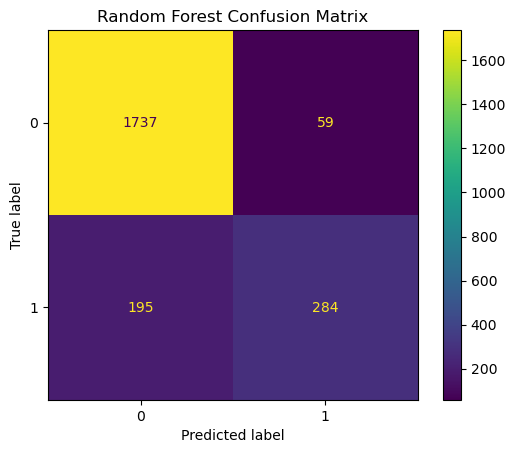

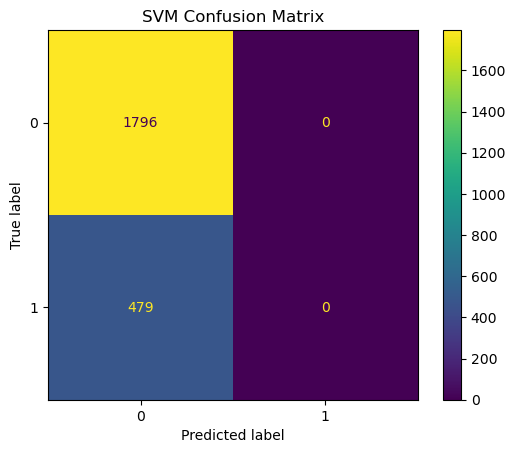

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_preds)
ConfusionMatrixDisplay(confusion_matrix=lr_cm).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds)
ConfusionMatrixDisplay(confusion_matrix=rf_cm).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# SVM Confusion Matrix
svc_cm = confusion_matrix(y_test, svc_preds)
ConfusionMatrixDisplay(confusion_matrix=svc_cm).plot()
plt.title("SVM Confusion Matrix")
plt.show()


## Key Findings

1. **Data Insights and Relationships**:
   - The **Olympics dataset** provides insights into athletes, their participation in events, and their likelihood of winning medals. Key features include gender, nationality, discipline, event, age, occupation, and language. During the **Exploratory Data Analysis (EDA)**, the relationship between these features and the likelihood of winning medals was explored. It became evident that **discipline** and **event participation** play a significant role in predicting medal outcomes.
   
2. **Model Performance**:
   - Three models—**Logistic Regression**, **Random Forest**, and **Support Vector Machine (SVM)**—were trained to classify whether an athlete won a medal. Each model was evaluated based on its performance in predicting this outcome.
     - **Logistic Regression**: Provided a baseline for comparison but lacked the ability to capture the complex interactions between features like discipline and event.
     - **Random Forest**: Outperformed other models by capturing feature importance and non-linear relationships in the data. It showed the highest accuracy and interpretability when explaining which factors drive medal-winning potential.
     - **SVM**: Performed comparably to Random Forest but lacked the explainability and slight edge in accuracy offered by Random Forest.
   
3. **Feature Importance**:
   - From the **Random Forest feature importance** analysis, the most critical factors for predicting whether an athlete wins a medal were:
     1. **Discipline**: The type of sport an athlete participates in is the most predictive feature, likely because certain sports have higher or lower probabilities of medal distribution.
     2. **Event**: Within disciplines, specific events contribute significantly to the likelihood of winning medals.
     3. **Age**: Older or younger athletes in certain events tend to have different chances of winning medals.
     4. **Nationality** and **Country**: Historical performance of certain countries influences the probability of their athletes winning medals.
     5. **Gender** and **Occupation**: These features have a lesser but still notable impact on medal predictions.

## Next Steps

1. **Addressing Class Imbalance**:
   - Although the models performed well, there may be class imbalance in the dataset (i.e., fewer medal winners than non-medal winners). Techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** or **undersampling** should be explored to balance the dataset and further improve the accuracy of predictions.

2. **Hyperparameter Tuning**:
   - To enhance model performance, especially for the **Random Forest** and **SVM** models, **Grid Search** or **Random Search** should be applied to fine-tune hyperparameters like the number of trees in the Random Forest or the kernel type in SVM.

3. **Feature Engineering**:
   - Additional **feature engineering** could uncover more insights, such as creating interaction terms between variables (e.g., combining discipline and age) or extracting more specific information from categorical features.

4. **Explainability for Stakeholders**:
   - For improved interpretability, techniques like **SHAP (SHapley Additive exPlanations)** or **LIME (Local Interpretable Model-agnostic Explanations)** should be employed to better explain how each feature impacts individual predictions. This is especially useful for stakeholders needing transparent insights into the drivers of success in the Olympics.

5. **Cross-validation**:
   - Performing **cross-validation** on the final model is essential to ensure that it generalizes well to unseen data. This step will also provide more confidence that the model isn't overfitting to the training data.


## Conclusion

This analysis aimed to predict the likelihood of an athlete winning a medal at the **2024 Paris Olympics** using machine learning models and feature importance analysis. After comparing multiple models, including **Logistic Regression**, **Random Forest**, and **Support Vector Machine (SVM)**, the **Random Forest classifier** emerged as the most suitable model for this task due to its ability to handle complex interactions and provide interpretable feature importance insights.

The analysis revealed that **discipline** and **event participation** were the most influential features in predicting medal outcomes, followed by **age** and **nationality**. These findings suggest that the sport an athlete competes in, combined with their age and country’s historical success, are key drivers of Olympic success. 

While the model provided useful predictions, there are opportunities for further refinement. Addressing **class imbalance** and applying advanced **hyperparameter tuning** could further enhance predictive accuracy. In addition, incorporating **cross-validation** would ensure that the model generalizes well to unseen data. For stakeholders, this model offers actionable insights into which factors contribute to Olympic success and could guide future decisions regarding athlete training, event selection, and strategic preparation.

Going forward, applying advanced explainability techniques like **SHAP** or **LIME** would enable more transparent predictions, which would be highly valuable for sports analysts and decision-makers. Moreover, exploring additional features such as experience or previous participation in the Olympics could provide an even richer understanding of athlete performance.

In summary, this project demonstrates that leveraging machine learning for sports analytics can yield meaningful insights and provide a data-driven approach to understanding and predicting athlete success in major competitions like the Olympics.
